In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
gold_data = pd.read_csv('/content/GoldData_Sheet_updeted.csv')

In [3]:
gold_data.head()

,Jewellery type,Weight(in grams),Purity(Carat),Color,Hallmarked,Price
0,Necklace,1,24,White,yes,183000
1,chain,19,20,Rose,no,74100
2,rings,9,22,Yellow,yes,38700
3,bracelet,26,20,Yellow,no,18800
4,bangles,45,20,Rose,yes,168000


In [4]:
gold_data.shape

(400, 6)

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Jewellery type    400 non-null    object
 1   Weight(in grams)  400 non-null    int64 
 2   Purity(Carat)     400 non-null    int64 
 3   Color             400 non-null    object
 4   Hallmarked        400 non-null    object
 5   Price             400 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.9+ KB


In [6]:
gold_data.describe(include='all')

,Jewellery type,Weight(in grams),Purity(Carat),Color,Hallmarked,Price
count,400,400.000000,400.000000,400,400,400.00000
unique,13,NaN,NaN,3,2,NaN
top,Necklace,NaN,NaN,Yellow,yes,NaN
freq,36,NaN,NaN,192,392,NaN
mean,NaN,18.822500,21.240000,NaN,NaN,98901.70750
std,NaN,14.552162,1.336738,NaN,NaN,72949.55446
min,NaN,0.000000,20.000000,NaN,NaN,8600.00000
25%,NaN,7.000000,20.000000,NaN,NaN,32863.50000
50%,NaN,13.000000,22.000000,NaN,NaN,85500.00000
75%,NaN,31.000000,22.000000,NaN,NaN,156200.00000


In [7]:
import seaborn as sns

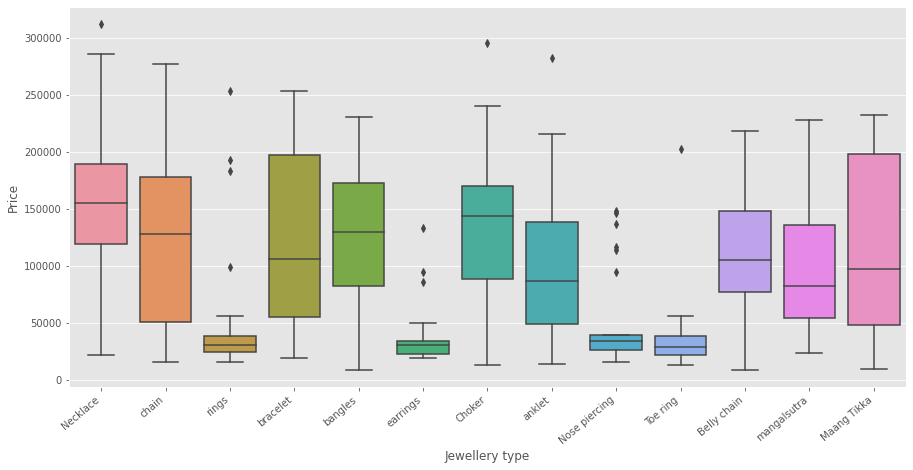

In [8]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Jewellery type',y='Price',data=gold_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

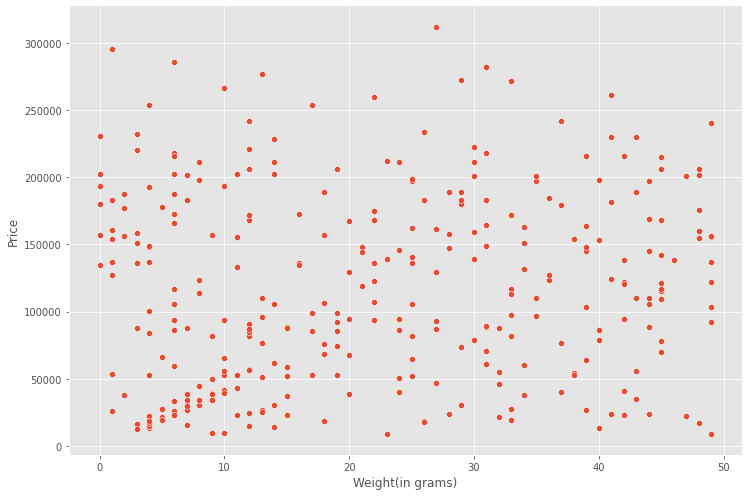

In [9]:
sns.relplot(x='Weight(in grams)',y='Price',data=gold_data,height=7,aspect=1.5)

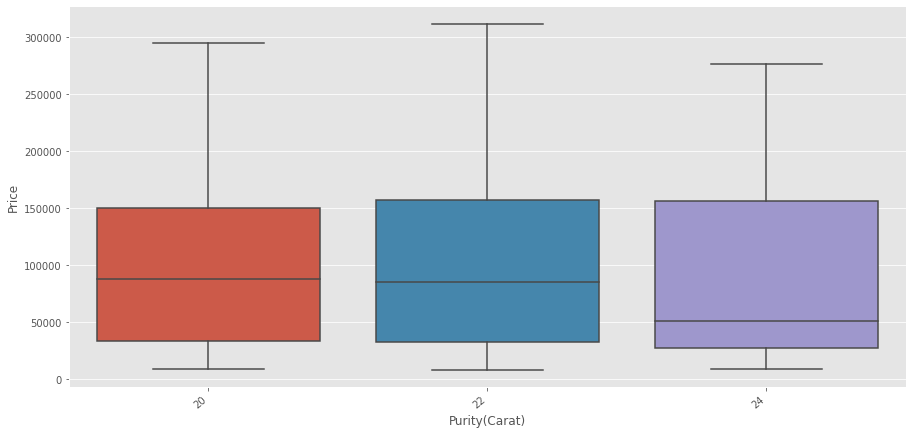

In [10]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Purity(Carat)',y='Price',data=gold_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

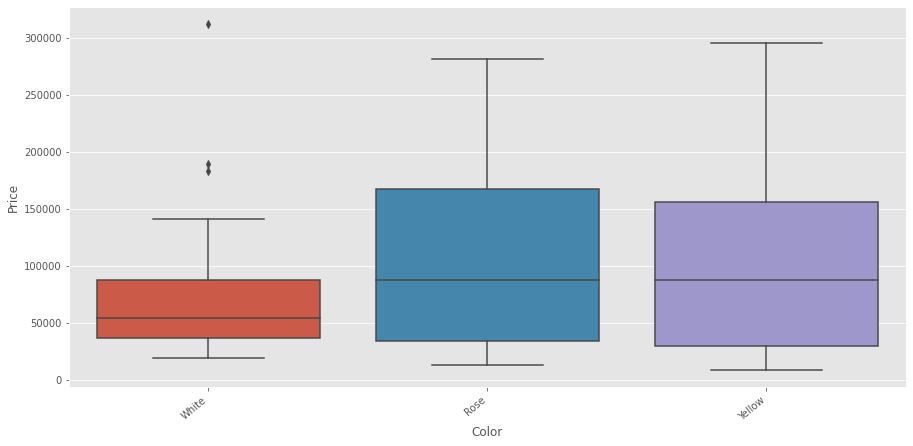

In [11]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Color',y='Price',data=gold_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

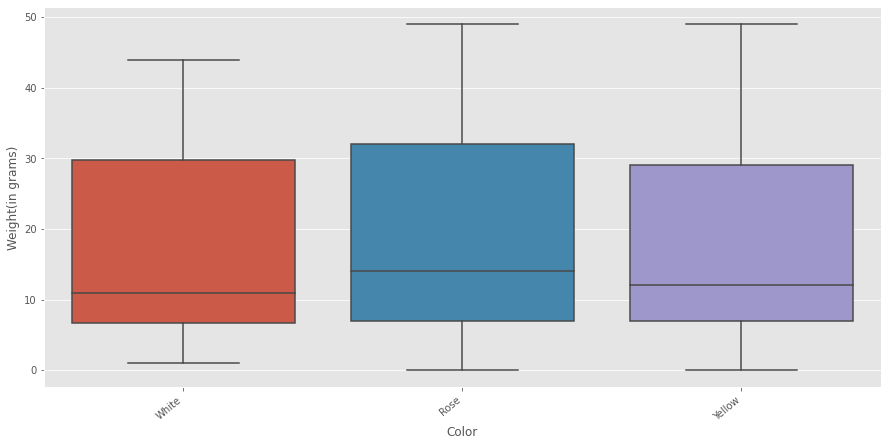

In [12]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Color',y='Weight(in grams)',data=gold_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [13]:
#Extracting training Data
X = gold_data[['Jewellery type','Weight(in grams)','Purity(Carat)','Color','Hallmarked ']]
y = gold_data['Price']

In [14]:
X

,Jewellery type,Weight(in grams),Purity(Carat),Color,Hallmarked
0,Necklace,1,24,White,yes
1,chain,19,20,Rose,no
2,rings,9,22,Yellow,yes
3,bracelet,26,20,Yellow,no
4,bangles,45,20,Rose,yes
...,...,...,...,...,...
395,Toe ring,7,22,Rose,yes
396,Belly chain,29,24,Yellow,yes
397,mangalsutra,22,20,Yellow,yes
398,Maang Tikka,36,20,Yellow,yes


In [15]:
y

0      183000
1       74100
2       38700
3       18800
4      168000
        ...  
395     38871
396    183300
397    122913
398    184800
399    148800
Name: Price, Length: 400, dtype: int64

In [16]:
y.shape

(400,)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

**Creating an OneHotEncoder object to contain all the possible categories**

In [26]:
ohe=OneHotEncoder()
ohe.fit(X[['Jewellery type','Color','Hallmarked ']])

OneHotEncoder()

**Creating a column transformer to transform categorical columns**

In [27]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Jewellery type','Color','Hallmarked ']),
                                    remainder='passthrough')

In [28]:
# Linear Regression Model
lr=LinearRegression()

In [29]:
pipe=make_pipeline(column_trans,lr)

In [30]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Belly chain', 'Choker', 'Maang Tikka', 'Necklace',
       'Nose piercing', 'Toe ring', 'anklet', 'bangles', 'bracelet',
       'chain', 'earrings', 'mangalsutra', 'rings'], dtype=object),
                                                                            array(['Rose', 'White', 'Yellow'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object)]),
                                                  ['Jewellery type', 'Color',
                                                   'Hallmarked '])])),
                ('linearregression', LinearRegression())])

In [32]:
y_pred=pipe.predict(X_test)

In [33]:
r2_score(y_test,y_pred)

0.1451326493720142

**Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score**

In [34]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [35]:
np.argmax(scores)

472

In [36]:
scores[np.argmax(scores)]

0.5565721785448415

In [38]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Choker',15,22,'Rose','yes']).reshape(1,5)))

array([136366.95223013])

In [47]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Necklace',40,24,'White','yes']).reshape(1,5)))

array([125544.22002093])

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.5565721785448415

In [40]:
import pickle

In [41]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [44]:
pipe.predict(pd.DataFrame(columns=['Jewellery type','Weight(in grams)','Purity(Carat)','Color','Hallmarked '],data=np.array(['Choker',15,22,'Rose','yes']).reshape(1,5)))

array([132307.547784])

In [45]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Belly chain', 'Choker', 'Maang Tikka', 'Necklace',
       'Nose piercing', 'Toe ring', 'anklet', 'bangles', 'bracelet',
       'chain', 'earrings', 'mangalsutra', 'rings'], dtype=object)